Arvin Aryanpour

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset "data"
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
data = pd.read_csv(url, index_col=0)

Demo question: Currently, logstic regression is being used to process two things. how can you process three?
Answer: you would have to use two models

In [ ]:
# Check column names
#sdp is systoic blood pressure
#ldl is low density lipoprotein cholesterol
#adiposity is body fat
#famhist is family history
#typea is tpye-A behavior
#obesity
#alcohol is current alcohol consuimption
#age is age at onset
#chd is corenary heart disease
print(data.columns)

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')


In [ ]:
# Exploratory Data Analysis
print(data.head())
print(data.info())
print(data.describe())

           sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
row.names                                                                    
1          160    12.00  5.73      23.11  Present     49    25.30    97.20   
2          144     0.01  4.41      28.61   Absent     55    28.87     2.06   
3          118     0.08  3.48      32.28  Present     52    29.14     3.81   
4          170     7.50  6.41      38.03  Present     51    31.99    24.26   
5          134    13.60  3.50      27.78  Present     60    25.99    57.34   

           age  chd  
row.names            
1           52    1  
2           63    1  
3           46    0  
4           58    1  
5           49    1  
<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 1 to 463
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64

In [ ]:
# Percentage of each class
#calculates relative frequency of each class in target variable
print(data['chd'].value_counts(normalize=True))

# Check for missing values
print(data.isnull().sum())

chd
0    0.65368
1    0.34632
Name: proportion, dtype: float64
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


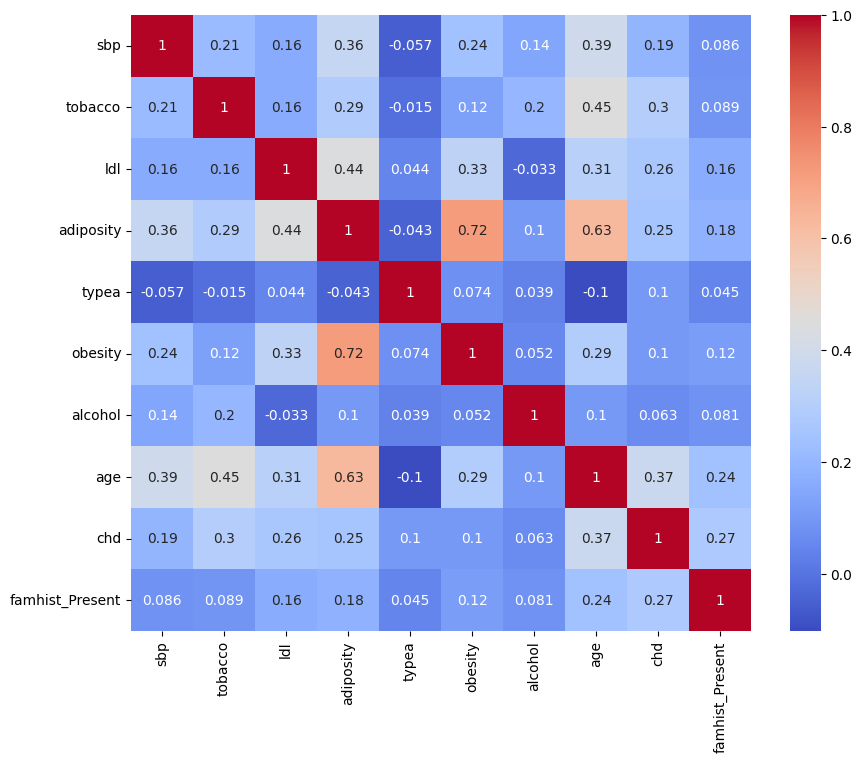

In [ ]:
# One-Hot Encoding for categorical variable 'famhist' if it exists
#converts family history variable into number one-hot encoding
#on-hot converts categorical variables into form machine learning algo can interpret
#original format (present/absent)
#drops first level to avoid multicollinearity, only famhist_present is created. if 0, implies absent
if 'famhist' in data.columns:
    data = pd.get_dummies(data, columns=['famhist'], drop_first=True)

# Correlation matrix after encoding
#relationships between features, red strong, blue weak correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Standardization
#all features, except chd, standardized to have mean 0 and stand dev 1
#ensures all features contribute equally
scaler = StandardScaler()
features = data.drop('chd', axis=1)
features_scaled = scaler.fit_transform(features)

In [ ]:
# Sigmoid function
#maps input values to range (0,1)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Cost function
#to measure error between predicted and actual
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [ ]:
# Mini-batch Gradient Descent
#update model perameters iteratively
#faster convergence & more stable updates compared to full batch
def mini_batch_gradient_descent(X, y, theta, alpha, epochs, batch_size=50):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        permuted_indices = np.random.permutation(m)
        X_shuffled = X[permuted_indices]
        y_shuffled = y[permuted_indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            h = sigmoid(X_batch.dot(theta))
            gradient = (1/len(y_batch)) * X_batch.T.dot(h - y_batch)
            theta -= alpha * gradient

        cost_history.append(compute_cost(theta, X, y))

    return theta, cost_history

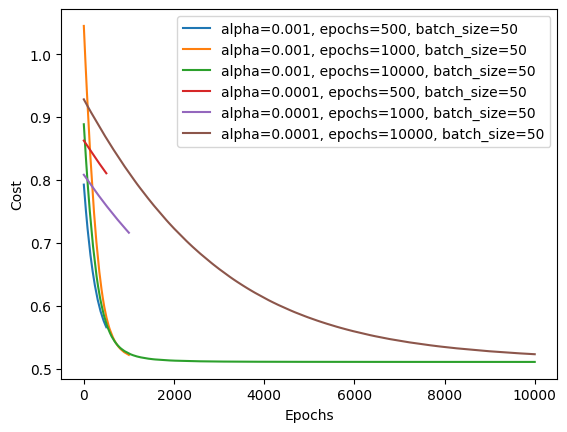

LogisticRegression(max_iter=10000)

In [ ]:
# Preparing data for gradient descent
X = np.c_[np.ones((features_scaled.shape[0], 1)), features_scaled]
y = data['chd'].values

# Initialize theta
#random theta initialized to avoid symmetry issues and bias
theta = np.random.rand(X.shape[1])

# Learning rates and epochs initialized
alphas = [0.001, 0.0001]
epochs_list = [500, 1000, 10000]

# Learning curves using mini-batch gradient descent
#learning curve for different epochs and learning rates plotted
#visualize cost function
batch_size = 50
for alpha in alphas:
    for epochs in epochs_list:
        theta_init = np.random.rand(X.shape[1])
        theta_final, cost_history = mini_batch_gradient_descent(X, y, theta_init, alpha, epochs, batch_size)
        plt.plot(cost_history, label=f'alpha={alpha}, epochs={epochs}, batch_size={batch_size}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Logistic regression with sklearn
#x=features, y=target
#test_size=proportion of dataset to use in test split (0.2=20%)
#train_size=proportion of dataset to use in training split
#random_state= controls shuffling of data before split (can remove shuffle by setting shuffle parameter to false)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

A reasonable place to stop for the alpha 0.001 is around 500 epochs. A reasonable place to stop for the alpha 0.0001 is around 1000 epochs. These values are concluded from the point at which the graph converges and values plateau, making additional data unneccessary

In [ ]:
#a reasonable place to stop for alpha =0.001 is around 500 epochs
#a reasonable place to stop for alpha =0.0001 is around 1000 epochs
#both answers are based on the point at which the values pleateau, making additional data unnecessary


# Predictions and comparison
#split data into training and testing sets, trains log reg model using sklearn and evaluates performance
#sklearn used as benchmark comparing results with custom log reg implementation
#retuns accuracy of model's predictions on test set (correct_pred / total_pred)

# Predictions and comparison
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual: 0', 'Actual: 1'], columns=['Predicted: 0', 'Predicted: 1'])

# Print Confusion Matrix with Headers
print(f'Confusion Matrix:\n{cm_df}')


Accuracy: 0.7849462365591398
Confusion Matrix:
           Predicted: 0  Predicted: 1
Actual: 0            54             5
Actual: 1            15            19
